In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

UsageError: Line magic function `%` not found.


In [14]:
import datetime 
import pandas_datareader.data as web

start=datetime.datetime(2012,1,1)
end=datetime.datetime(2017,1,1)

tesla_stock = pd.read_csv('Tesla_Stock.csv')
tesla_stock.head()

,Date,Open,High,Low,Close,Volume
0,2012-01-03,28.94,29.50,27.65,28.08,928052
1,2012-01-04,28.21,28.67,27.50,27.71,630036
2,2012-01-05,27.76,27.93,26.85,27.12,1005432
3,2012-01-06,27.20,27.79,26.41,26.89,687081
4,2012-01-09,27.00,27.49,26.12,27.25,896951


In [15]:
tesla_stock['Date']=pd.to_datetime(tesla_stock['Date'])

In [16]:
tesla_stock.set_index('Date',inplace=True)

In [19]:
tesla_stock.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,28.94,29.50,27.65,28.08,928052
2012-01-04,28.21,28.67,27.50,27.71,630036
2012-01-05,27.76,27.93,26.85,27.12,1005432
2012-01-06,27.20,27.79,26.41,26.89,687081
2012-01-09,27.00,27.49,26.12,27.25,896951


In [28]:
gm_stock = pd.read_csv('./GM_Stock.csv')
gm_stock['Date']=pd.to_datetime(gm_stock['Date'])
gm_stock.set_index('Date',inplace=True)

In [29]:
gm_stock.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,20.83,21.18,20.75,21.05,9321420
2012-01-04,21.05,21.37,20.75,21.15,7856752
2012-01-05,21.10,22.29,20.96,22.17,17884040
2012-01-06,22.26,23.03,22.24,22.92,18234608
2012-01-09,23.20,23.43,22.70,22.84,12091714


In [30]:
ford_stock = pd.read_csv('./Ford_Stock.csv')
ford_stock['Date']=pd.to_datetime(ford_stock['Date'])
ford_stock.set_index('Date',inplace=True)

In [31]:
ford_stock.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,11.00,11.25,10.99,11.13,45709811
2012-01-04,11.15,11.53,11.07,11.30,79725188
2012-01-05,11.33,11.63,11.24,11.59,67877467
2012-01-06,11.74,11.80,11.52,11.71,59840605
2012-01-09,11.83,11.95,11.70,11.80,53981467


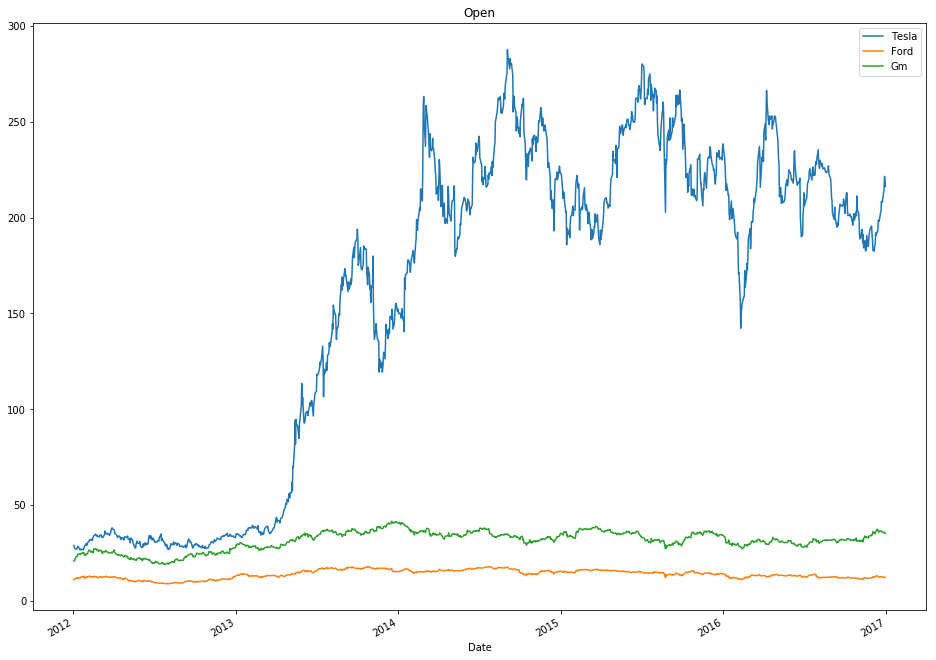

In [34]:
fig=plt.figure(figsize=(16,12))
plt.title('Open')

tesla_stock['Open'].plot(label='Tesla')
ford_stock['Open'].plot(label='Ford')
gm_stock['Open'].plot(label="Gm")
plt.legend();

In [39]:
tesla_stock['Open'].argmax()

C:\ANACONDA\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  """Entry point for launching an IPython kernel.


Timestamp('2014-09-03 00:00:00')

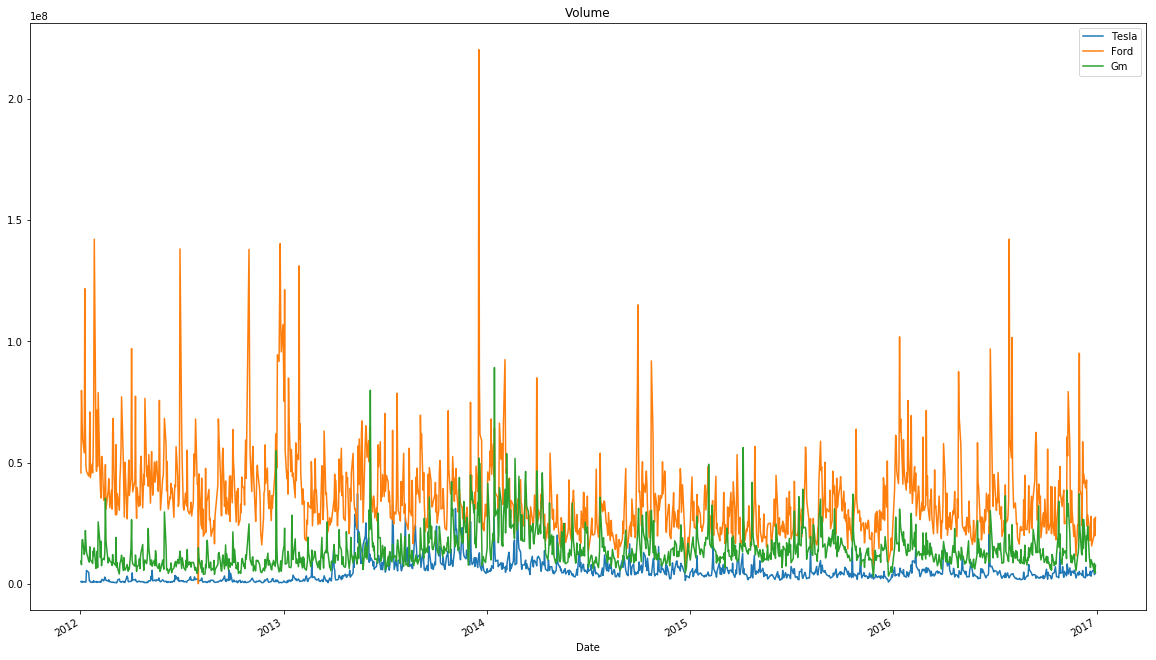

In [41]:
fig=plt.figure(figsize=(20,12))
plt.title('Volume')

tesla_stock['Volume'].plot(label='Tesla')
ford_stock['Volume'].plot(label='Ford')
gm_stock['Volume'].plot(label="Gm")
plt.legend();

In [43]:
ford_stock['Volume'].argmax()

C:\ANACONDA\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  """Entry point for launching an IPython kernel.


Timestamp('2013-12-18 00:00:00')

In [44]:
tesla_stock['Total Traded']=tesla_stock['Open']*tesla_stock['Volume']
ford_stock['Total Traded']=ford_stock['Open']*ford_stock['Volume']
gm_stock['Total Traded']=gm_stock['Open']*gm_stock['Volume']

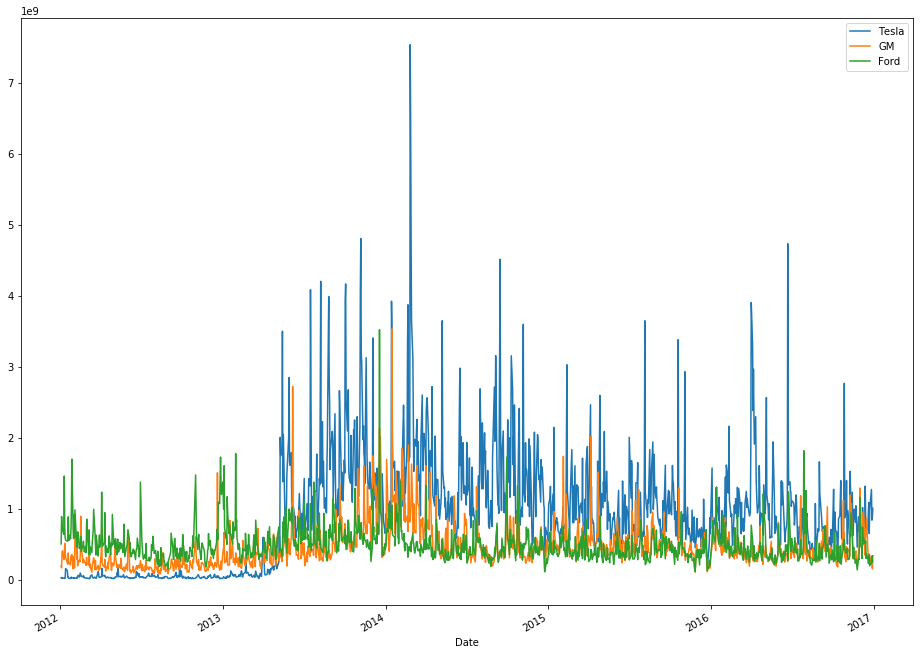

In [45]:
fig=plt.figure(figsize=(16,12))
tesla_stock['Total Traded'].plot(label='Tesla')
gm_stock['Total Traded'].plot(label='GM')
ford_stock['Total Traded'].plot(label='Ford')
plt.legend();

In [46]:
tesla_stock['Total Traded'].max()

7543310000.0

In [48]:
tesla_stock['Total Traded'].argmax()
## NOT THE SAME DAY WHERE OPEN WAS MAX

C:\ANACONDA\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  """Entry point for launching an IPython kernel.


Timestamp('2014-02-25 00:00:00')

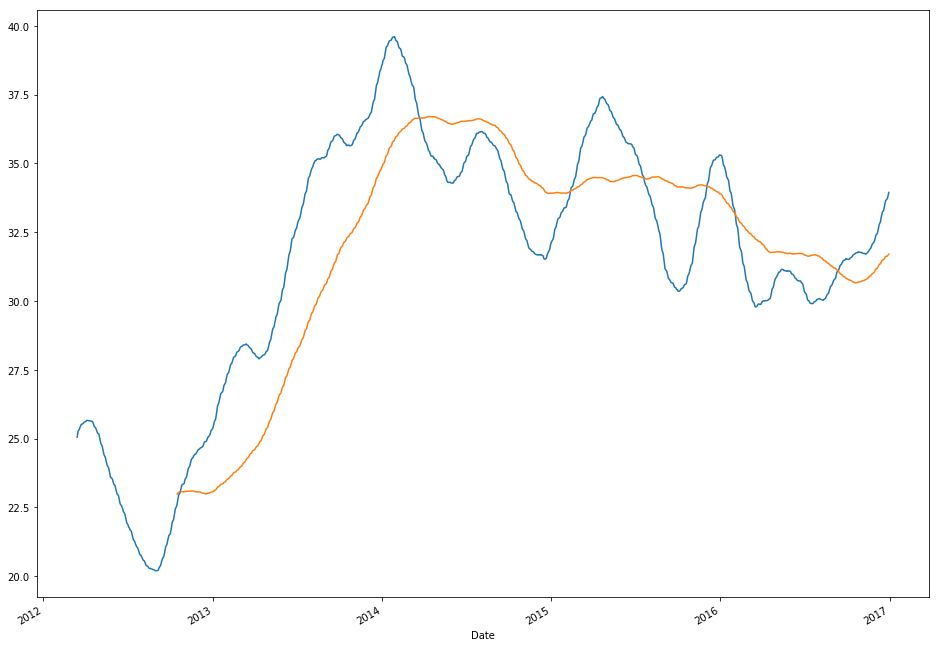

In [49]:
fig=plt.figure(figsize=(16,12))
gm_stock.rolling(50).mean()['Open'].plot(label='MA50')
gm_stock.rolling(200).mean()['Open'].plot(label='MA200')

In [50]:
from pandas.plotting import scatter_matrix

In [53]:
df=pd.concat([tesla_stock['Open'],gm_stock['Open'],ford_stock['Open']],axis=1)
df.columns=['TESLA',"GM","FORD"]

In [54]:
df.head()

,TESLA,GM,FORD
Date,,,
2012-01-03,28.94,20.83,11.00
2012-01-04,28.21,21.05,11.15
2012-01-05,27.76,21.10,11.33
2012-01-06,27.20,22.26,11.74
2012-01-09,27.00,23.20,11.83


<Figure size 1440x1440 with 0 Axes>

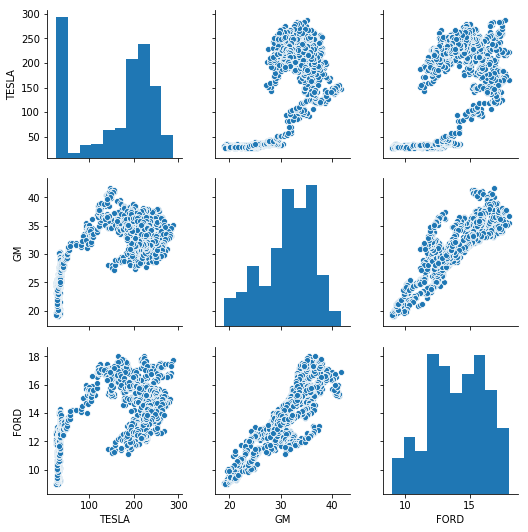

In [67]:
fig=plt.figure(figsize=(20,20))
sns.pairplot(df)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022D8E680A20>,
      dtype=object)

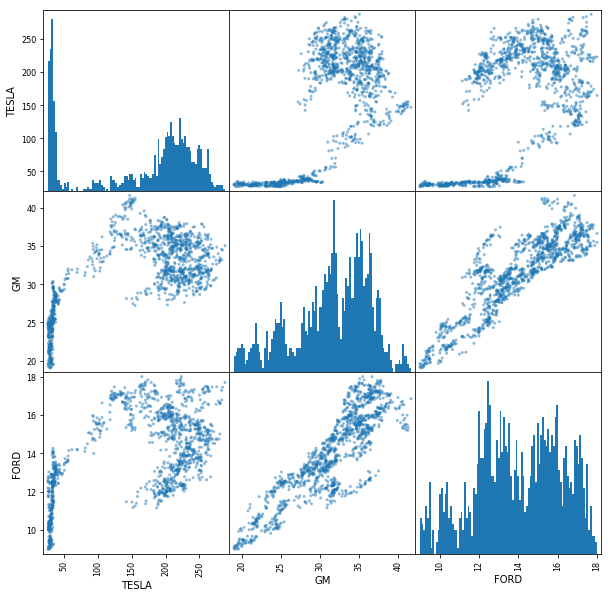

In [61]:
scatter_matrix(df,figsize = (10, 10), hist_kwds = {'bins' : 100})

C:\ANACONDA\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


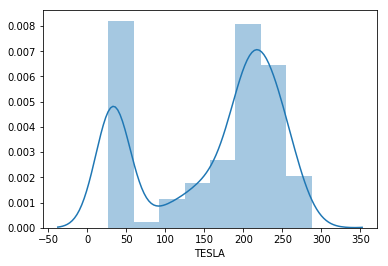

In [71]:
sns.distplot(df['TESLA'])

In [72]:
start = '2012-01'
end = '2012-02'
ford_candle = ford_stock.loc[start:end]

In [75]:
# Returns
tesla_stock['Return']=(tesla_stock['Close']/tesla_stock['Close'].shift(1))-1

In [77]:
tesla_stock['Return']=tesla_stock['Return']*100

In [84]:
tesla_stock['Return']=tesla_stock['Close'].pct_change()

In [85]:
tesla_stock.head()

,Open,High,Low,Close,Volume,Total Traded,Return
Date,,,,,,,
2012-01-03,28.94,29.50,27.65,28.08,928052,26857824.88,NaN
2012-01-04,28.21,28.67,27.50,27.71,630036,17773315.56,-0.013177
2012-01-05,27.76,27.93,26.85,27.12,1005432,27910792.32,-0.021292
2012-01-06,27.20,27.79,26.41,26.89,687081,18688603.20,-0.008481
2012-01-09,27.00,27.49,26.12,27.25,896951,24217677.00,0.013388


In [86]:
ford_stock['Return']=ford_stock['Close'].pct_change()
gm_stock['Return']=gm_stock['Close'].pct_change()

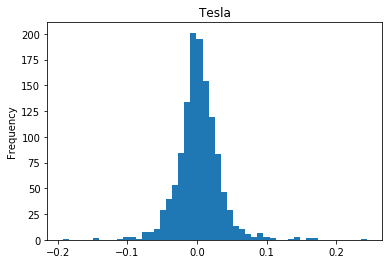

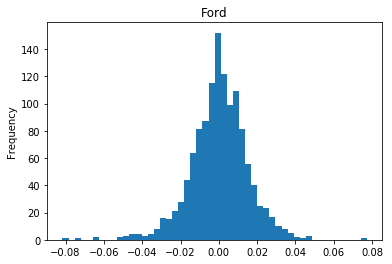

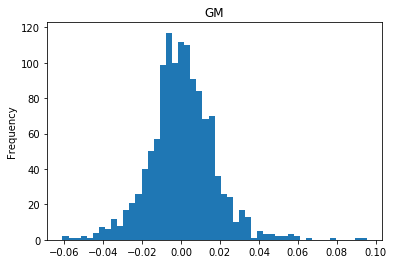

In [88]:
fig = plt.figure(0)
tesla_stock['Return'].plot(kind = 'hist', bins = 50)
plt.title('Tesla')

plt.show()

fig = plt.figure(1)
ford_stock['Return'].plot(kind = 'hist', bins = 50)
plt.title('Ford')
plt.show()

fig = plt.figure(2)
gm_stock['Return'].plot(kind = 'hist', bins = 50)
plt.title('GM')
plt.show()

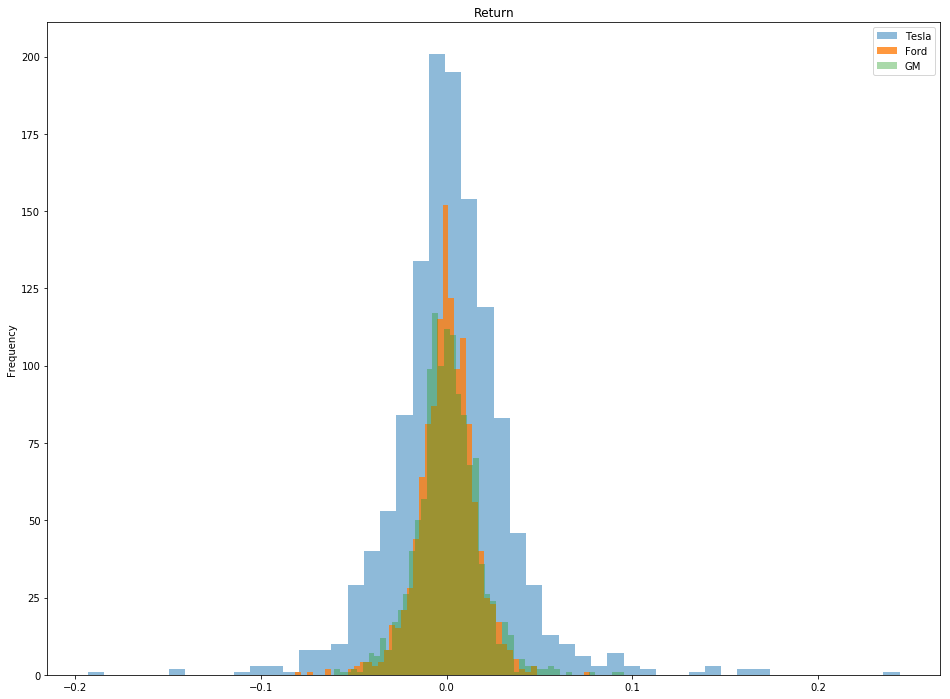

In [96]:
fig=plt.figure(figsize=(16,12))
tesla_stock['Return'].plot(kind = 'hist', bins = 50,label='Tesla',alpha=0.5)
plt.title('Return')
ford_stock['Return'].plot(kind = 'hist', bins = 50,label='Ford',alpha=0.8)
gm_stock['Return'].plot(kind = 'hist', bins = 50,label='GM',alpha=0.4)
plt.legend();

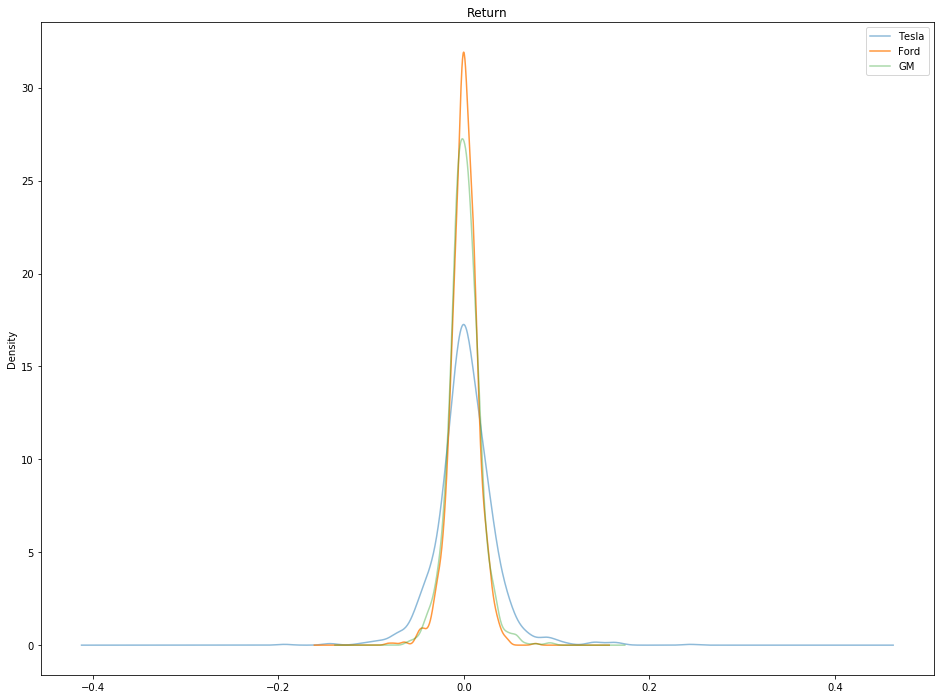

In [98]:
fig=plt.figure(figsize=(16,12))
tesla_stock['Return'].plot(kind = 'kde',label='Tesla',alpha=0.5)
plt.title('Return')
ford_stock['Return'].plot(kind = 'kde',label='Ford',alpha=0.8)
gm_stock['Return'].plot(kind = 'kde',label='GM',alpha=0.4)
plt.legend();

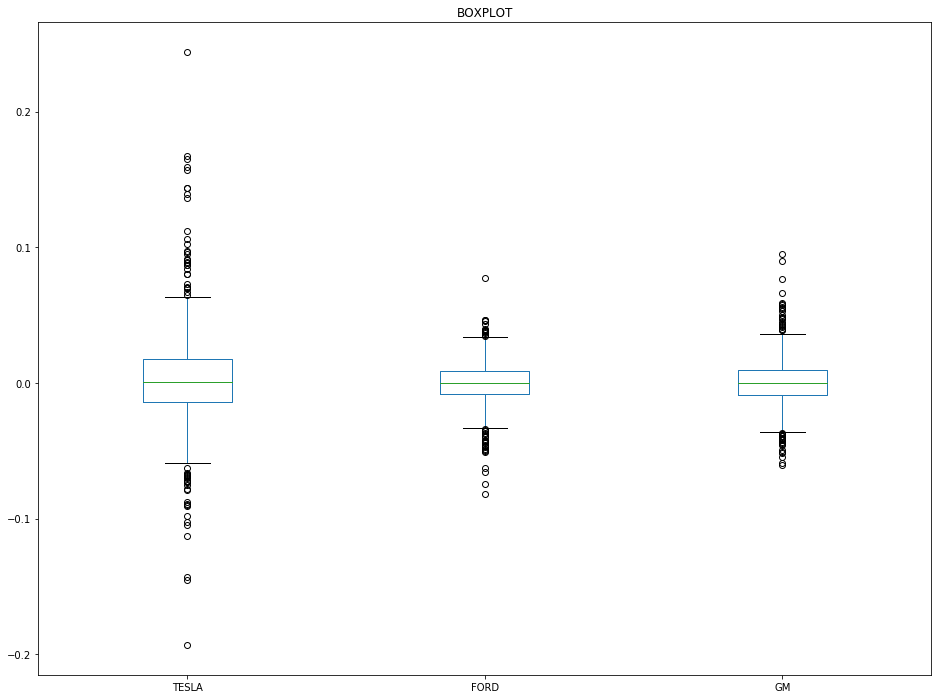

In [118]:
box_df=pd.concat([tesla_stock['Return'],ford_stock['Return'],gm_stock['Return']],axis=1)
box_df.columns=['TESLA','FORD','GM']
box_df.plot(kind='box',title='BOXPLOT',figsize=(16,12))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022D8B97CDD8>,
      dtype=object)

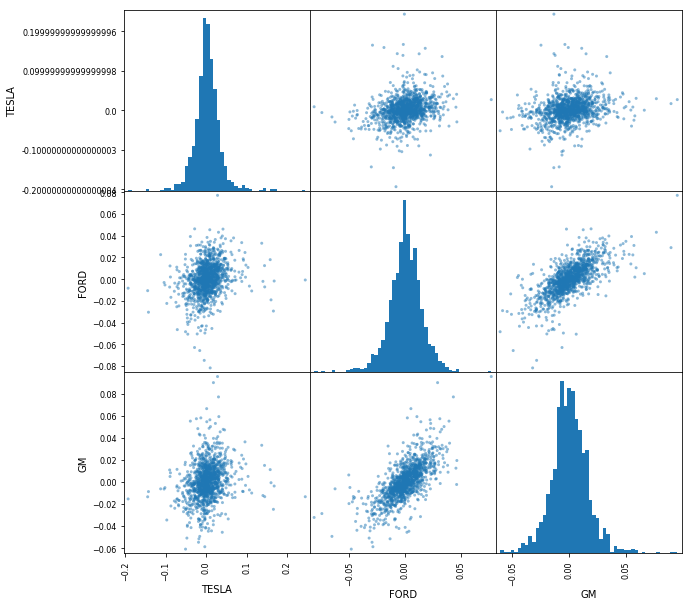

In [119]:
from pandas.plotting import scatter_matrix

scatter_matrix(box_df, figsize = (10, 10), hist_kwds={'bins':50})

C:\ANACONDA\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ANACONDA\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


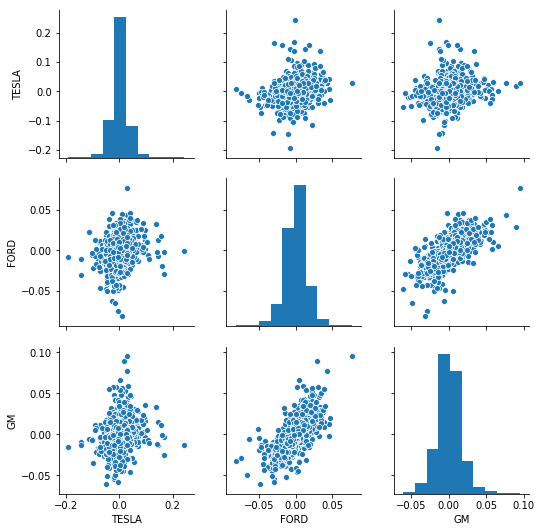

In [120]:
sns.pairplot(box_df)

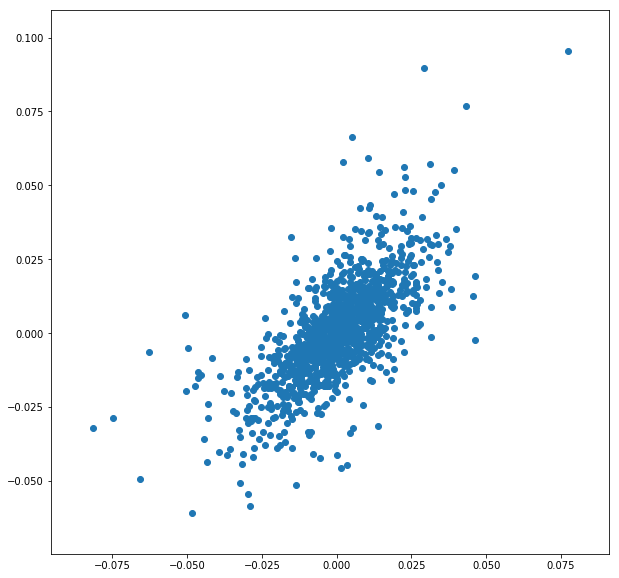

In [124]:
fig=plt.figure(figsize=(10,10))
plt.scatter(ford_stock['Return'],gm_stock['Return'])

In [126]:
#Cummalative Return
tesla_stock['Cummalative Return']=(1+tesla_stock['Return']).cumprod()
tesla_stock.head()

,Open,High,Low,Close,Volume,Total Traded,Return,Cummalative Return
Date,,,,,,,,
2012-01-03,28.94,29.50,27.65,28.08,928052,26857824.88,NaN,NaN
2012-01-04,28.21,28.67,27.50,27.71,630036,17773315.56,-0.013177,0.986823
2012-01-05,27.76,27.93,26.85,27.12,1005432,27910792.32,-0.021292,0.965812
2012-01-06,27.20,27.79,26.41,26.89,687081,18688603.20,-0.008481,0.957621
2012-01-09,27.00,27.49,26.12,27.25,896951,24217677.00,0.013388,0.970442


In [127]:
gm_stock['Cummalative Return']=(1+gm_stock['Return']).cumprod()
ford_stock['Cummalative Return']=(1+ford_stock['Return']).cumprod()

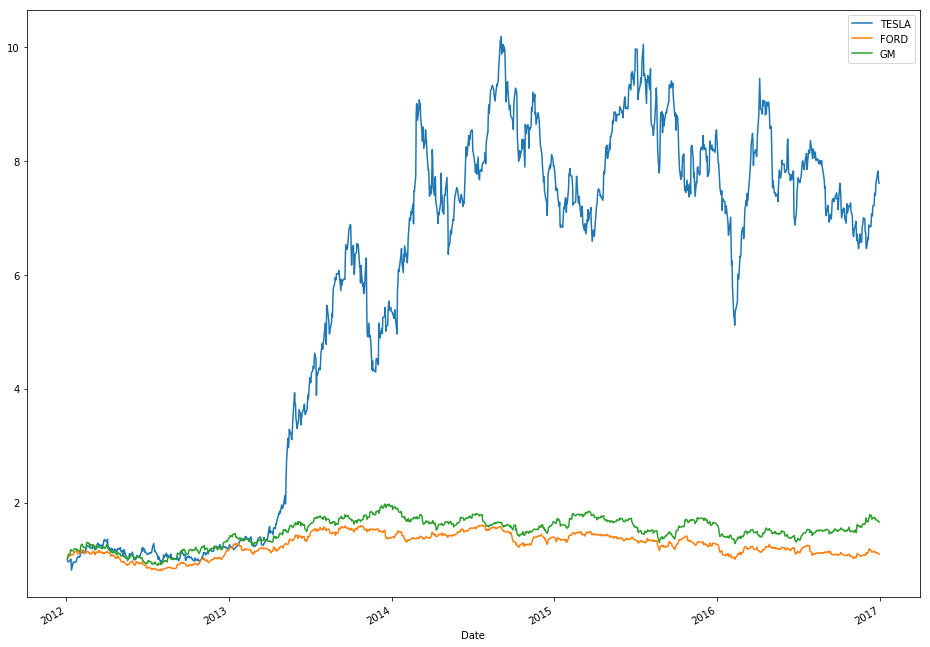

In [129]:
fig=plt.figure(figsize=(16,12))
tesla_stock['Cummalative Return'].plot(label='TESLA')
ford_stock['Cummalative Return'].plot(label='FORD')
gm_stock['Cummalative Return'].plot(label='GM')
plt.legend();